Import Data

In [1]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the data
housing = pd.read_csv ("https://raw.githubusercontent.com/markumreed/colab_sklearn/main/housing.csv")

In [3]:
# Display first few rows of the database
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# Check formatting
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
# Descriptive Analysis 
housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
# Columns name
housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
# Rename columns
housing.columns = [x.lower().replace(".","").replace(" ","_") for x in housing.columns] #List comprehension
housing.columns

Index(['avg_area_income', 'avg_area_house_age', 'avg_area_number_of_rooms',
       'avg_area_number_of_bedrooms', 'area_population', 'price', 'address'],
      dtype='object')

Exploratory Data Analysis

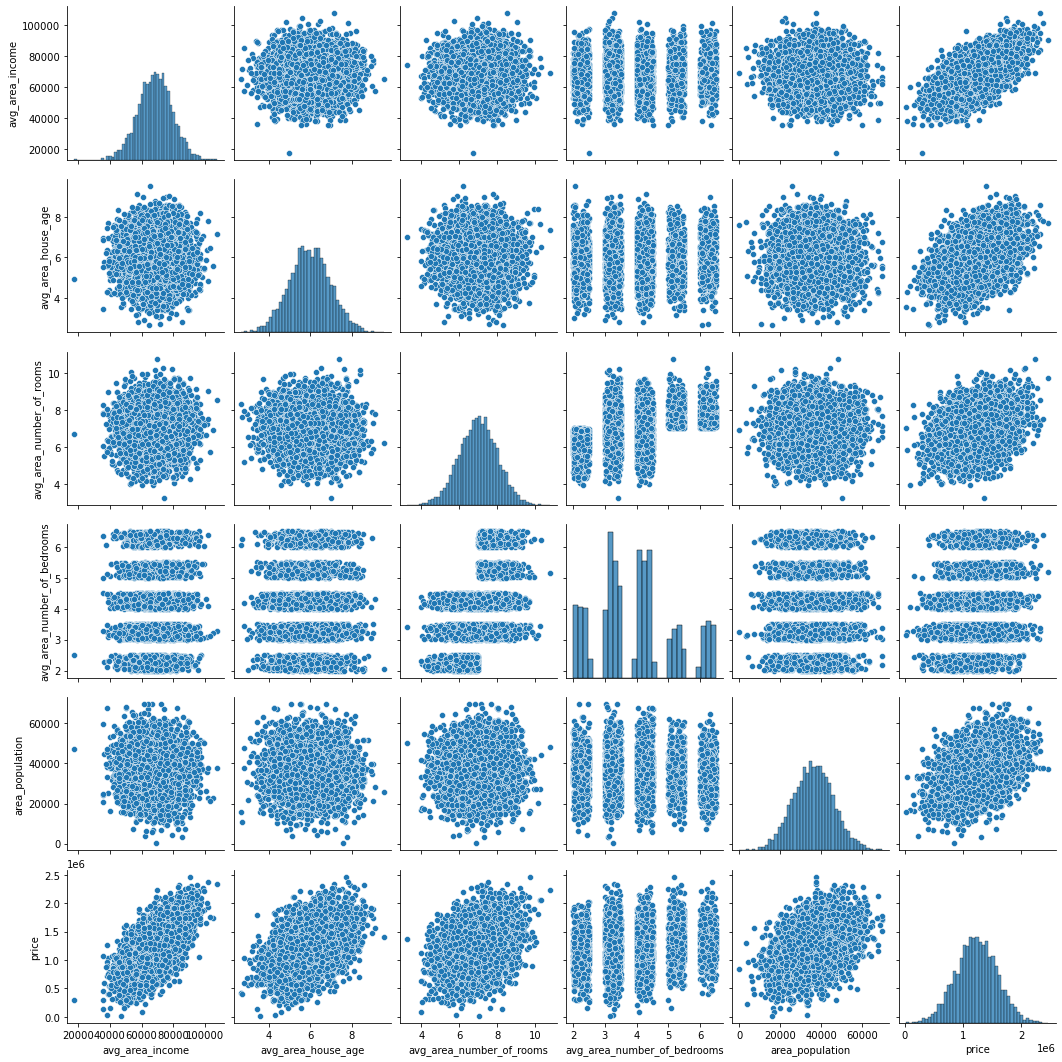

In [8]:
sns.pairplot (housing)

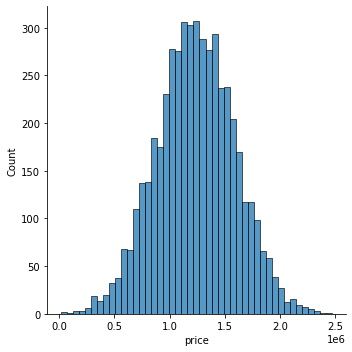

In [9]:
# Zoom to the price distribution per the above
sns.displot (housing["price"]);

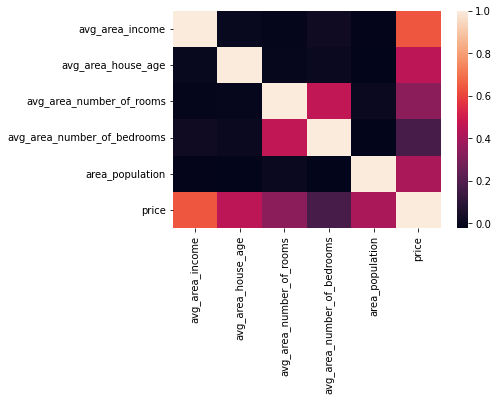

In [10]:
# correlation
sns.heatmap (housing.corr());

Linear Regression Model

In [11]:
housing.columns

Index(['avg_area_income', 'avg_area_house_age', 'avg_area_number_of_rooms',
       'avg_area_number_of_bedrooms', 'area_population', 'price', 'address'],
      dtype='object')

In [12]:
y = housing ["price"]
X = housing.drop (["price", "address"], axis = 1)

Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Define the training set 
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.33, random_state = 42)

In [15]:
X_train

,avg_area_income,avg_area_house_age,avg_area_number_of_rooms,avg_area_number_of_bedrooms,area_population
1522,67716.748222,6.431119,7.753989,5.28,40562.188948
835,78095.352630,6.837193,7.119862,3.00,32346.434992
358,55577.071754,6.533916,7.162536,3.47,19560.012414
138,63876.059910,7.080219,7.187433,3.37,38052.876443
299,52188.118727,5.636892,5.807401,4.03,42495.754677
...,...,...,...,...,...
4426,76223.561256,6.371627,5.342217,2.42,30165.337445
466,56685.014442,6.958045,7.502115,3.38,43322.166854
3092,66195.337714,6.507971,6.611861,3.14,37288.923574
3772,58694.515017,7.394768,9.269453,4.32,49960.977236


Create and Train Model

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# Define linear model
lm = LinearRegression ()

In [18]:
lm.fit (X_train, y_train)

LinearRegression()

Model Evaluation

In [19]:
# Intercept
print (lm.intercept_)

-2638142.110429731


In [20]:
# Coefficient
coef_df = pd.DataFrame (lm.coef_, X.columns, columns = ["Coefficient"])
coef_df

,Coefficient
avg_area_income,21.589887
avg_area_house_age,166102.501246
avg_area_number_of_rooms,119895.936402
avg_area_number_of_bedrooms,1901.071012
area_population,15.231503


Model Predictions

In [21]:
predictions = lm.predict (X_test)

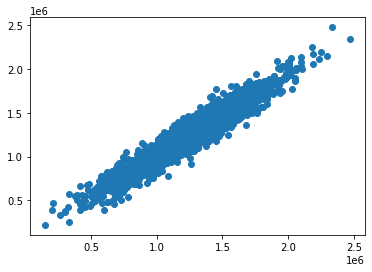

In [22]:
plt.scatter (y_test, predictions);

Residual Plot

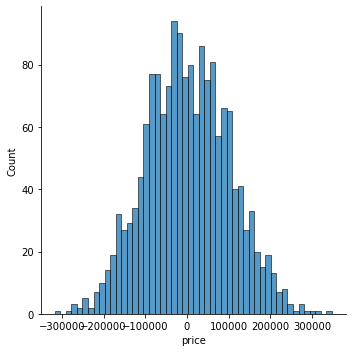

In [24]:
sns.displot ((y_test - predictions), bins = 50);

In [25]:
from sklearn import metrics

In [27]:
print ("MAE", metrics.mean_absolute_error (y_test, predictions))
print ("MSE", metrics.mean_squared_error (y_test, predictions))
print ("RMSE", np.sqrt(metrics.mean_squared_error (y_test, predictions)))

MAE 80893.81190770201
MSE 10013679978.582804
RMSE 100068.3765161742
